In [33]:
import matplotlib.pyplot as plt
import numpy as np

datafile = np.loadtxt('machine-learning-ex2/ex2/ex2data1.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

The shape of the data is: (100, 3)


In [34]:
X = datafile[:, :2]
y = datafile[:, 2]
m = y.shape[0]

In [35]:
print(X.shape)
print(y.shape)

print(X[:5])
print(y[:5])

(100, 2)
(100,)
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0. 0. 0. 1. 1.]


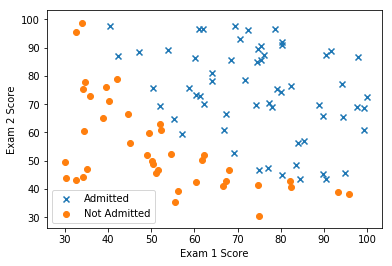

In [36]:
# plot training data, showing exam scores that were admitted and not admitted
plt.scatter(X[(y==1), 0], X[(y==1), 1], marker='x')
plt.scatter(X[(y==0), 0], X[(y==0), 1], marker='o')
plt.ylabel("Exam 2 Score")
plt.xlabel("Exam 1 Score")
plt.legend(["Admitted", "Not Admitted"])
plt.show()

In [55]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def hypothesis(X, theta):
    """ The output of h(x) gives the probability that y is equal to 1 given
        x, as parameterised by theta (weights) """
    # note that numpy.dot automatically does the correct calculation for theta.T * X using code below
    return sigmoid(np.dot(X, theta))

def feature_normalise(X):
    X_norm = (X - (np.mean(X, axis=0))) / np.std(X, axis = 0)
    return X_norm

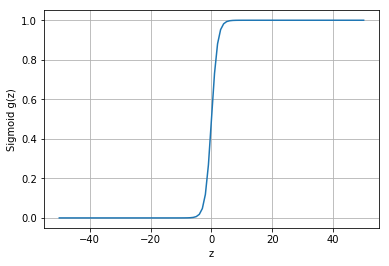

In [38]:
tester_x = np.arange(-50, 51, 1)
tester_y = sigmoid(tester_x)
plt.plot(tester_x, tester_y)
plt.ylabel("Sigmoid g(z)")
plt.xlabel("z")
plt.grid()
plt.show()

Notice that when z is greater than 0, g(z) is greater than 0.5. This forms our decision boundary for our binary classifier that decides whther y is 1 or 0.

In [56]:
# use standardisation on our features with zero mean and 1 std dev
X_std = feature_normalise(X)

print(X_std[:10])

# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X_std = np.column_stack((bias, X_std))

print(X_std.shape)

random_gen = np.random.RandomState(1)
#theta = random_gen.normal(loc = 0.0, scale = 0.01, size =(X_std.shape[1],))
theta = np.zeros(X_std.shape[1],)

print(theta.shape)

[[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]
 [ 0.69152826  0.49337794]
 [-1.06199728 -0.5357394 ]
 [-0.23437234  1.63818413]
 [ 0.4845113  -1.06373024]
 [ 0.53998666  1.14651105]
 [ 0.97044832 -1.22709853]]
(100, 3)
(3,)


In [40]:
def log_regression_cost(X, theta, y):
    m = len(y)
    hx = hypothesis(X, theta)
    cost = (-y.dot(np.log(hx)) - ((1 - y).dot(np.log(1 - hx)))) / m
    return cost

In [41]:
cost = log_regression_cost(X_std, theta, y)
print(cost)
print("Expected cost from the exercise guidelines is 0.693 - Very close, " 
      "although ours is more optimal due to non-zero initialised weights.")

0.6931471805599451
Expected cost from the exercise guidelines is 0.693 - Very close, although ours is more optimal due to non-zero initialised weights.


In [60]:
def log_regression_GD(X, y, theta, alpha, iterations):
    J_history = []
    m = float(len(y))
    weights = np.copy(theta)
    for cycle in range(iterations):
        hx = sigmoid(np.dot(X, theta))
        errors = (hx - y)
        weights -= ((alpha/m) * X.T.dot(errors))
        cost = (-y.dot(np.log(hx)) - ((1 - y).dot(np.log(1 - hx)))) / m
        J_history.append(cost)
    return J_history, weights

In [61]:
costs, weights = log_regression_GD(X_std, y, theta, alpha=0.01, iterations=5000)

print("Weights found by gradient descent: {0}".format(weights))

print("\nExpected weights from Andrew Ng's R model: [-3.6303 1.1664]")

print("Final cost found wasL {0}".format(costs[-1]))

Weights found by gradient descent: [ 5.         14.06145677 12.5493073 ]

Expected weights from Andrew Ng's R model: [-3.6303 1.1664]
Final cost found wasL 0.69314718056


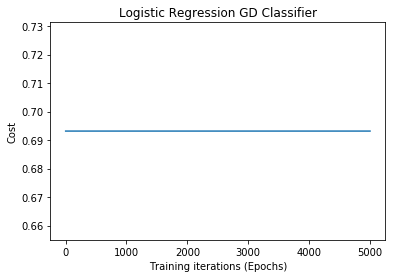

In [62]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.title("Logistic Regression GD Classifier")
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

In [182]:
def plot_decision_boundary(X, y, theta):
    plt_x = [np.min(X[:, 1]), np.max(X[:, 1])]
    
    x_1 = [(-theta[0] - x2) for x2 in plt_x]
    x_2 = 
    plt_y = (-1/theta[2])*((theta[1]*plt_x) + theta[0])
    plt.plot(plt_x, plt_y)
    plt.legend(["Admitted", "Not Admitted", "Decision Boundary"])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-182-cbaea9df9d43>, line 5)

In [183]:
# plot_decision_boundary(X_std, y, weights)

plt_x = [2, 90]
print(plt_x)

x_1 = [((-weights[0] - (weights[2]*x2))/weights[1]) for x2 in plt_x]
print(x_1)

x_2 = [((-weights[0] - (weights[1]*x1))/weights[2]) for x1 in plt_x]
print(x_2)

[2, 90]
[-2.296321115646955, -84.39736043654625]
[-2.6050118403396447, -96.92781291636352]


In [63]:
def predict_probability(X, theta):
    return sigmoid(np.dot(X, theta))

In [64]:
X_predict = np.array([[25.5435476, 40.24243],
                      [15.73235, 25.46477]])
print(X_predict)

pred_norm = (X_predict - (np.mean(X_predict, axis=0))) / np.std(X_predict, axis = 0)

print(pred_norm)

# add a column of 1's to the predictions for the bias unit
bias = np.ones((2, 1))
X_pred_std = np.column_stack((bias, pred_norm))

print(X_pred_std)

predict_probability = sigmoid(np.dot(X_pred_std, weights))

print(predict_probability)

[[25.5435476 40.24243  ]
 [15.73235   25.46477  ]]
[[ 1.  1.]
 [-1. -1.]]
[[ 1.  1.  1.]
 [ 1. -1. -1.]]
[1.00000000e+00 4.11684407e-10]
